<a href="https://colab.research.google.com/github/sajjad73hajizade/shirazU-learn/blob/main/Perform_sensitivity_analysis_on_the_formula_of_the_energy_reached_to_the_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pysolar

In [3]:
from pysolar.solar import *
import datetime
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [4]:
#Fd or Gcd
latitude = 27.1889399
longitude = 56.337230
Height = 1000
date = datetime.datetime(2007, 11, 16, 17, 20, 0, 0, tzinfo=datetime.timezone.utc)
day_of_year = date.timetuple().tm_yday

altitude = get_altitude(latitude, longitude, date)
if altitude >= 0:
    Zenith_solar = 90 - get_altitude(latitude, longitude, date)
else:
    Zenith_solar = 90 + get_altitude(latitude, longitude, date)


a = 1
r0 = 0
r1 = 0
rk = 0

while a < 2:
    C_T = input("Please insert climate type <Tropical / Mid latitude summer / Subarctic winter / mid latitude Winter> : ")

    if C_T == 'T':
        a = 3
        r0 = 0.95
        r1 = 0.98
        rk = 1.02

    elif C_T == 'M':
        a = 3
        r0 = 0.97
        r1 = 0.99
        rk = 1.02

    elif C_T == 'S':
        a = 3
        r0 = 0.99
        r1 = 0.99
        rk = 1.01

    elif C_T == 'W':
        a = 3
        r0 = 1.03
        r1 = 1.01
        rk = 1.00

    else:
        print("The entered value is not correct\nPlease Try again")
        a = 1


a0 = r0 * (0.4237 - 0.00821 * (6 - Height)**2)
a1 = r1 * (0.5055 + 0.00595 * (6.5 - Height)**2)
k = rk * (0.2711 + 0.01858 * (2.5 - Height)**2)
b1 = np.cos(Zenith_solar)


tb = a0 + a1 * np.exp(-k/b1)
tb = np.float64(tb)

Gon = 1367 * (1 + 0.033 * np.cos(360*day_of_year/365))
Gcb = tb * Gon * np.cos(Zenith_solar)

td = 0.271 - 0.294 * tb
Gcd = td * Gon * np.cos(Zenith_solar)

Please insert climate type <Tropical / Mid latitude summer / Subarctic winter / mid latitude Winter> : T


In [5]:
#E for landa1 to landa2 from planks law
def E_delta_landa(a, b, temp):
    h = 6.626*10**-34
    c = 3*10**8
    k = 1.38*10**-23

    a1 = 2.0 * h * c ** 2

    integrand = lambda x : a1 / ((x ** 5) * (np.exp(h * c / (x * k * temp)) - 1.0))
    result, error = spi.quad(integrand, a, b)
    return result


Landsat9 : Band5(NIR) > 0.85e-6 to  0.879e-6 

Landsat9 : Band6(SWIR) > 1.566e-6 to  1.651e-6

Landsat9 : Band10(IR) > 10.6e-6 to  11.19e-6


In [6]:
#Ls and teta
#NIR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree = []
y_ls_nir = []
while k <= 90:
    ls = (1 / np.pi) * 0.5 * 0.5 * (E_delta_landa(0.85e-6, 0.879e-6, 5788) * 0.5 * np.cos(np.deg2rad(k)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree.extend([k])
    y_ls_nir.extend([ls])
    k = k + 1

#SWIR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree1 = []
y_ls_nir1 = []
while k <= 90:
    ls = (1 / np.pi) * 0.5 * 0.5 * (E_delta_landa(1.566e-6, 1.651e-6, 5788) * 0.5 * np.cos(np.deg2rad(k)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree1.extend([k])
    y_ls_nir1.extend([ls])
    k = k + 1

#IR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree2 = []
y_ls_nir2 = []
while k <= 90:
    ls = (1 / np.pi) * 0.5 * 0.5 * (E_delta_landa(10.6e-6, 11.19e-6, 5788) * 0.5 * np.cos(np.deg2rad(k)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree2.extend([k])
    y_ls_nir2.extend([ls])
    k = k + 1

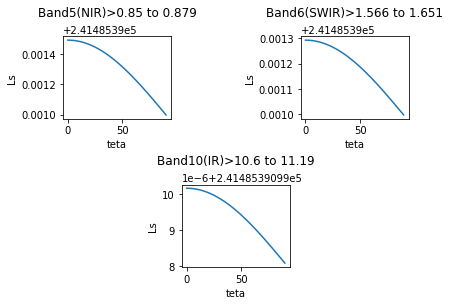

In [17]:
plt.subplot(231)
plt.plot(x_degree, y_ls_nir)
plt.title("Band5(NIR)>0.85 to 0.879", pad=20)
plt.xlabel("teta")
plt.ylabel("Ls")


plt.subplot(233)
plt.plot(x_degree1, y_ls_nir1)
plt.title("Band6(SWIR)>1.566 to 1.651", pad=20)
plt.xlabel("teta")
plt.ylabel("Ls")

plt.subplot(235)
plt.plot(x_degree2, y_ls_nir2)
plt.title("Band10(IR)>10.6 to 11.19", pad=20)
plt.xlabel("teta")
plt.ylabel("Ls")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.8)
plt.show()

In [18]:
#Ls and T0
#NIR    p=0.5   Tv=0.5  teta=45
k = 0
x_degree = []
y_ls_nir = []
while k <= 1:
    ls = (1 / np.pi) * 0.5 * 0.5 * (E_delta_landa(0.85e-6, 0.879e-6, 5788) * k * np.cos(np.deg2rad(45)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree.extend([k])
    y_ls_nir.extend([ls])
    k = k + 0.1

#SWIR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree1 = []
y_ls_nir1 = []
while k <= 1:
    ls = (1 / np.pi) * 0.5 * 0.5 * (E_delta_landa(1.566e-6, 1.651e-6, 5788) * k * np.cos(np.deg2rad(45)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree1.extend([k])
    y_ls_nir1.extend([ls])
    k = k + 0.1

#IR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree2 = []
y_ls_nir2 = []
while k <= 1:
    ls = (1 / np.pi) * 0.5 * 0.5 * (E_delta_landa(10.6e-6, 11.19e-6, 5788) * k * np.cos(np.deg2rad(45)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree2.extend([k])
    y_ls_nir2.extend([ls])
    k = k + 0.1

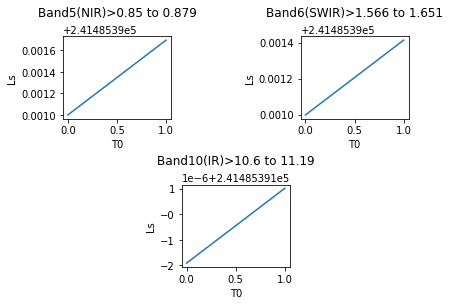

In [19]:
plt.subplot(231)
plt.plot(x_degree, y_ls_nir)
plt.title("Band5(NIR)>0.85 to 0.879", pad=20)
plt.xlabel("T0")
plt.ylabel("Ls")


plt.subplot(233)
plt.plot(x_degree1, y_ls_nir1)
plt.title("Band6(SWIR)>1.566 to 1.651", pad=20)
plt.xlabel("T0")
plt.ylabel("Ls")

plt.subplot(235)
plt.plot(x_degree2, y_ls_nir2)
plt.title("Band10(IR)>10.6 to 11.19", pad=20)
plt.xlabel("T0")
plt.ylabel("Ls")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.8)
plt.show()

In [20]:
#Ls and P
#NIR    T0=0.5   Tv=0.5  teta=45
k = 0
x_degree = []
y_ls_nir = []
while k <= 1:
    ls = (1 / np.pi) * k * 0.5 * (E_delta_landa(0.85e-6, 0.879e-6, 5788) * 0.5 * np.cos(np.deg2rad(45)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree.extend([k])
    y_ls_nir.extend([ls])
    k = k + 0.1

#SWIR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree1 = []
y_ls_nir1 = []
while k <= 1:
    ls = (1 / np.pi) * k * 0.5 * (E_delta_landa(1.566e-6, 1.651e-6, 5788) * 0.5 * np.cos(np.deg2rad(45)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree1.extend([k])
    y_ls_nir1.extend([ls])
    k = k + 0.1

#IR    p=0.5   Tv=0.5  T0=0.5
k = 0
x_degree2 = []
y_ls_nir2 = []
while k <= 1:
    ls = (1 / np.pi) * k * 0.5 * (E_delta_landa(10.6e-6, 11.19e-6, 5788) * 0.5 * np.cos(np.deg2rad(45)) * (0.879e-6 - 0.85e-6) + Gcd)
    x_degree2.extend([k])
    y_ls_nir2.extend([ls])
    k = k + 0.1

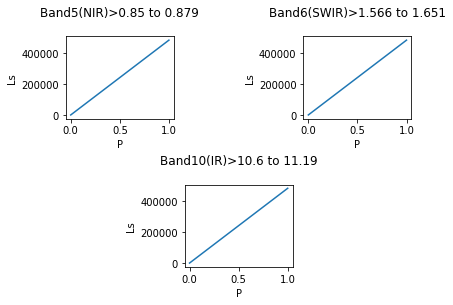

In [21]:
plt.subplot(231)
plt.plot(x_degree, y_ls_nir)
plt.title("Band5(NIR)>0.85 to 0.879", pad=20)
plt.xlabel("P")
plt.ylabel("Ls")


plt.subplot(233)
plt.plot(x_degree1, y_ls_nir1)
plt.title("Band6(SWIR)>1.566 to 1.651", pad=20)
plt.xlabel("P")
plt.ylabel("Ls")

plt.subplot(235)
plt.plot(x_degree2, y_ls_nir2)
plt.title("Band10(IR)>10.6 to 11.19", pad=20)
plt.xlabel("P")
plt.ylabel("Ls")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.8)
plt.show()